In [154]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

In [2]:
file_uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [3]:
house_price_data = pd.read_csv('./BostonHousing.csv')
print(house_price_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [4]:
x_data = house_price_data.copy()
type(x_data)

pandas.core.frame.DataFrame

In [5]:
x_data = house_price_data.copy()
y_data = x_data.pop("MEDV")

In [6]:
model = tf.keras.Sequential()

In [7]:
# 모델의 설정
model.add(tf.keras.layers.Dense(64, input_dim=13,activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(512, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation=None))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 174,337
Trainable params: 174,337
Non-trainable params: 0
_________________________________________________________________


In [8]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.04) ### 경사 하강법으로 global min 에 찾아가는 최적화 방법 선언.
loss=tf.keras.losses.mean_squared_error  ## 예측값 과 정답의 오차값 정의.
metrics=tf.keras.metrics.RootMeanSquaredError() ### 학습하면서 평가할 메트릭스 선언

model.compile(loss =loss, optimizer= optimizer, metrics=[metrics])

In [9]:
result=model.fit(x_data, y_data, epochs=3000, batch_size=100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6/6 [==============================] - 0s 5ms/step - loss: 84.4276 - root_mean_squared_error: 9.1884
Epoch 502/3000
6/6 [==============================] - 0s 7ms/step - loss: 84.5752 - root_mean_squared_error: 9.1965
Epoch 503/3000
6/6 [==============================] - 0s 5ms/step - loss: 84.4645 - root_mean_squared_error: 9.1905
Epoch 504/3000
6/6 [==============================] - 0s 6ms/step - loss: 84.5067 - root_mean_squared_error: 9.1928
Epoch 505/3000
6/6 [==============================] - 0s 5ms/step - loss: 84.4731 - root_mean_squared_error: 9.1909
Epoch 506/3000
6/6 [==============================] - 0s 7ms/step - loss: 84.5626 - root_mean_squared_error: 9.1958
Epoch 507/3000
6/6 [==============================] - 0s 6ms/step - loss: 84.4757 - root_mean_squared_error: 9.1911
Epoch 508/3000
6/6 [==============================] - 0s 6ms/step - loss: 84.5545 - root_mean_squared_error: 9.1953
Epoch 509/3000
6/6 [==============================]

In [10]:
print(result.history.keys())

dict_keys(['loss', 'root_mean_squared_error'])


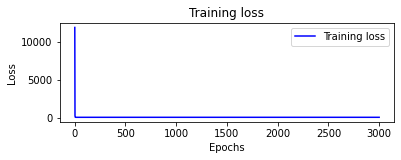

In [11]:
### history에서 loss key를 가지는 값들만 추출
loss = result.history['loss']

### loss그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

16/16 [==============================] - 0s 2ms/step - loss: 84.5524 - root_mean_squared_error: 9.1952

 Test rmse: 9.1952


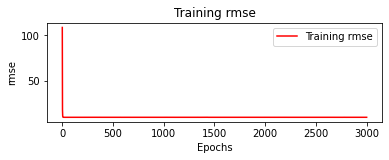

In [12]:
### history에서 root_mean_squared_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'r-', label='Training rmse')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(x_data, y_data)[1]))
plt.show()

In [13]:
print(model.evaluate(x_data,y_data))
print("\n Test rmse : %.4f" % (model.evaluate(x_data, y_data)[1]))

16/16 [==============================] - 0s 2ms/step - loss: 84.5524 - root_mean_squared_error: 9.1952
[84.55243682861328, 9.195240020751953]
16/16 [==============================] - 0s 2ms/step - loss: 84.5524 - root_mean_squared_error: 9.1952

 Test rmse : 9.1952


In [14]:
import seaborn as sns

In [15]:
file_uploaded = files.upload()

Saving test.csv to test.csv


In [16]:
## 데이터 읽어오기.## 데이터 읽어오기.
raw_df = pd.read_csv("./test.csv")
print("data infor")
print(raw_df.info())
print("data head")
print(raw_df.head())
dataset=raw_df.copy()

data infor
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       10 non-null     int64
 1   B       10 non-null     int64
 2   C       10 non-null     int64
 3   D       10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes
None
data head
   A   B    C  D
0  1  10  100  2
1  2  20  200  2
2  3  30  300  2
3  4  40  400  2
4  5  50  500  2


In [21]:
x_data = dataset.copy()
y_data = x_data.pop("D")

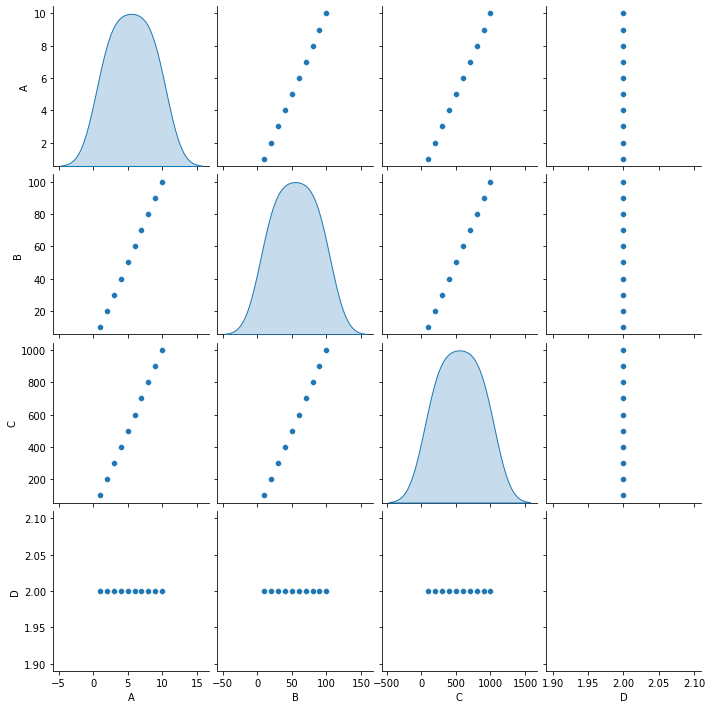

In [22]:
## 데이터 분포도 확인하기.
sns.pairplot(dataset[['A','B','C','D']], diag_kind="kde")
plt.show()

In [25]:

## 데이터의 min , max, mean, std 값 구하기.
dataset_stats =dataset.describe()
dataset_stats =dataset_stats.transpose()

In [27]:
## data normalization
def min_max_norm(x):
  return (x-dataset_stats['min'])/(dataset_stats['max']-dataset_stats['min'])

def standard_norm(x):
  return (x-dataset_stats['mean'])/dataset_stats['std']



In [31]:
min_max_norm_train_data = min_max_norm(dataset)
standard_norm_train_data = standard_norm(dataset)

In [32]:
print("min max : ")
print(min_max_norm_train_data)
print("standard :")
print(standard_norm_train_data)

min max : 
          A         B         C   D
0  0.000000  0.000000  0.000000 NaN
1  0.111111  0.111111  0.111111 NaN
2  0.222222  0.222222  0.222222 NaN
3  0.333333  0.333333  0.333333 NaN
4  0.444444  0.444444  0.444444 NaN
5  0.555556  0.555556  0.555556 NaN
6  0.666667  0.666667  0.666667 NaN
7  0.777778  0.777778  0.777778 NaN
8  0.888889  0.888889  0.888889 NaN
9  1.000000  1.000000  1.000000 NaN
standard :
          A         B         C   D
0 -1.486301 -1.486301 -1.486301 NaN
1 -1.156012 -1.156012 -1.156012 NaN
2 -0.825723 -0.825723 -0.825723 NaN
3 -0.495434 -0.495434 -0.495434 NaN
4 -0.165145 -0.165145 -0.165145 NaN
5  0.165145  0.165145  0.165145 NaN
6  0.495434  0.495434  0.495434 NaN
7  0.825723  0.825723  0.825723 NaN
8  1.156012  1.156012  1.156012 NaN
9  1.486301  1.486301  1.486301 NaN


In [33]:
print(house_price_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 174,337
Trainable params: 174,337
Non-trainable params: 0
_________________________________________________________________


In [56]:
house_price_data = pd.read_csv('./BostonHousing.csv')
print(house_price_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [57]:
x_data = house_price_data.copy()
y_data = x_data.pop("MEDV")

In [58]:
## 데이터의 min , max, mean, std 값 구하기.
x_stats =x_data.describe()
x_stats =x_data.transpose()

In [59]:
## data normalization
def min_max_norm2(x):
  return (x-x_stats['min'])/(x_stats['max']-xstats['min'])

def standard_norm2(x):
  return (x-x_stats['mean'])/x_stats['std']



In [61]:
data = pd.read_csv('./BostonHousing.csv')

In [62]:
x_data = data.copy()

In [63]:
y_data = data.pop('MEDV')

In [64]:
dataset_stats = data.describe()
dataset_stats = dataset_stats.transpose()

In [65]:
## data normalization
def min_max_norm(x):
  return (x - dataset_stats['min']) / (dataset_stats['max'] - dataset_stats['min'])

def standard_norm(x):
  return (x - dataset_stats['mean']) / dataset_stats['std']

In [66]:
normed_train_data = standard_norm(data)

In [67]:
input_layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_layer)
x = tf.keras.layers.Dense(100, activation='sigmoid')(x)
x = tf.keras.layers.Dense(300, activation='sigmoid')(x)
output_layer = tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_6 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_7 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 301       
Total params: 36,401
Trainable params: 36,401
Non-trainable params: 0
_________________________________________________________________


In [76]:
loss = tf.keras.losses.mean_squared_error
optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

In [77]:
result=model.fit(normed_train_data, y_data, epochs=1000, batch_size=100)

Epoch 1/1000
6/6 [==============================] - 0s 3ms/step - loss: 84.4619 - root_mean_squared_error: 9.1916
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 84.4616 - root_mean_squared_error: 9.1903
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 84.4548 - root_mean_squared_error: 9.1899
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 84.4508 - root_mean_squared_error: 9.1897
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 84.4313 - root_mean_squared_error: 9.1887
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 84.4312 - root_mean_squared_error: 9.1886
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 84.4257 - root_mean_squared_error: 9.1883
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 84.4252 - root_mean_squared_error: 9.1883
Epoch 9/1000
6/6 [==============================] - 0s 2ms/step - loss: 84.4254 - root_m

In [78]:
print(result.history.keys())

dict_keys(['loss', 'root_mean_squared_error'])


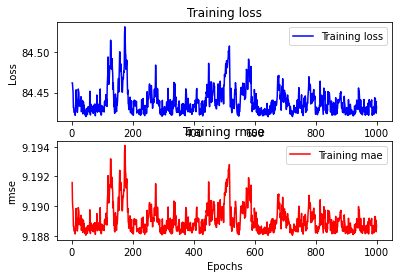

In [79]:
loss = result.history['loss']

# loss 그래프
epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mae = result.history['root_mean_squared_error']
epochs = range(1, len(mae)+1)

# mae그래프
plt.subplot(212)
plt.plot(epochs, mae, 'r-', label='Training mae')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

In [80]:
print('\n Test rmse: %.4f' %(model.evaluate(normed_train_data,y_data)[1]))

16/16 [==============================] - 0s 1ms/step - loss: 84.4212 - root_mean_squared_error: 9.1881

 Test rmse: 9.1881


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
#### data 분리
X_train1, X_test, Y_train1, Y_test = train_test_split(normed_train_data,y_data,test_size=0.2,shuffle=False)

X_train, X_val, Y_train, Y_val = train_test_split(X_train1, Y_train1, test_size=0.2, shuffle=False)

print("x train")
print(X_train)
print("label train")
print(Y_train)

print("x val")
print(X_val)
print("label val")
print(Y_val)

print("x test")
print(X_test)
print("label test")
print(Y_test)


x train
         CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0   -0.419367  0.284548 -1.286636  ... -1.457558  0.440616 -1.074499
1   -0.416927 -0.487240 -0.592794  ... -0.302794  0.440616 -0.491953
2   -0.416929 -0.487240 -0.592794  ... -0.302794  0.396035 -1.207532
3   -0.416338 -0.487240 -1.305586  ...  0.112920  0.415751 -1.360171
4   -0.412074 -0.487240 -1.305586  ...  0.112920  0.440616 -1.025487
..        ...       ...       ...  ...       ...       ...       ...
318 -0.373364 -0.487240 -0.180279  ... -0.025651  0.422104 -0.321110
319 -0.364824 -0.487240 -0.180279  ... -0.025651  0.433277  0.010774
320 -0.400617 -0.487240 -0.547607  ...  0.528635  0.440616 -0.763621
321 -0.398990 -0.487240 -0.547607  ...  0.528635  0.440616 -0.809832
322 -0.379279 -0.487240 -0.547607  ...  0.528635  0.440616 -0.693603

[323 rows x 13 columns]
label train
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
318    23.1
319    21.0
320    23.8
321    23.1
322    

In [84]:
input_layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_layer)
x = tf.keras.layers.Dense(100, activation='sigmoid')(x)
x = tf.keras.layers.Dense(300, activation='sigmoid')(x)
out_layer = tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_11 (Dense)             (None, 300)               30300     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 301       
Total params: 36,401
Trainable params: 36,401
Non-trainable params: 0
_________________________________________________________________


In [87]:
loss=tf.keras.losses.mse
optimizer=tf.keras.optimizers.SGD(lr=0.0004)
metrics=tf.keras.metrics.RootMeanSquaredError()
model.compile(loss=loss,optimizer=optimizer,metrics=[metrics])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [95]:
result=model.fit(X_train,Y_train,epochs=2000, batch_size=10,validation_data=(X_val,Y_val))

Epoch 1/2000
33/33 [==============================] - 0s 6ms/step - loss: 210.0370 - root_mean_squared_error: 14.4927 - val_loss: 113.5484 - val_root_mean_squared_error: 10.6559
Epoch 2/2000
33/33 [==============================] - 0s 2ms/step - loss: 76.5094 - root_mean_squared_error: 8.7470 - val_loss: 127.2419 - val_root_mean_squared_error: 11.2802
Epoch 3/2000
33/33 [==============================] - 0s 2ms/step - loss: 75.9870 - root_mean_squared_error: 8.7171 - val_loss: 129.7906 - val_root_mean_squared_error: 11.3926
Epoch 4/2000
33/33 [==============================] - 0s 2ms/step - loss: 75.5670 - root_mean_squared_error: 8.6929 - val_loss: 132.4587 - val_root_mean_squared_error: 11.5091
Epoch 5/2000
33/33 [==============================] - 0s 2ms/step - loss: 75.6285 - root_mean_squared_error: 8.6965 - val_loss: 126.2017 - val_root_mean_squared_error: 11.2340
Epoch 6/2000
33/33 [==============================] - 0s 2ms/step - loss: 75.3848 - root_mean_squared_error: 8.6824 - 

In [96]:
print(result.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


In [97]:
loss = result.history['loss']
val_loss = result.history['val_loss']

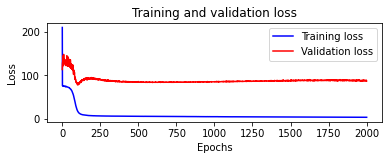

In [98]:
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [100]:
file_uploaded = files.upload()

Saving one_hot_encording_test.csv to one_hot_encording_test.csv


In [101]:
file_uploaded = files.upload()

Saving iris.csv to iris.csv


In [105]:
from sklearn.preprocessing import LabelEncoder

In [107]:
one_data = pd.read_csv('./one_hot_encording_test.csv', names = ['length','width','volume','class_name'])

In [108]:
a_data = one_data.copy()
b_data = one_data.pop('class_name')

print('one data value : {}'.format(a_data))
print('one data label : {}'.format(b_data))

one data value :      length  width  volume class_name
5.1     0.5    1.4    0.02        car
4.9     0.2    1.4    0.03        car
4.7     0.2    1.3    0.04        car
4.6     0.1    1.5    0.05      truck
5.0     0.6    1.4    0.02      truck
5.4     0.9    1.7    0.03      truck
4.6     0.4    1.4    0.33        bus
5.0     0.4    1.5    0.12     person
4.4     0.9    1.4    0.12     person
3.9     0.1    1.5    0.21        bus
2.2     0.5    1.4    0.03        car
4.2     0.0    1.4    0.02        car
5.1     0.2    1.3    0.05        car
4.2     0.1    1.5    0.06      truck
2.0     0.6    1.4    0.07      truck
4.4     0.9    1.7    0.08      truck
7.6     0.4    1.4    0.02        bus
8.0     0.4    1.5    0.09     person
6.4     0.9    1.4    0.04     person
5.9     0.1    1.5    0.02        bus
one data label : 5.1       car
4.9       car
4.7       car
4.6     truck
5.0     truck
5.4     truck
4.6       bus
5.0    person
4.4    person
3.9       bus
2.2       car
4.2       car


In [117]:
e = LabelEncoder()
e.fit(a_data)
print('Label Class String : {}'.format(e.classes_)

c = e.transform(a_data)
print('Label Class Int : {}'.format(c)

c_encoded = tf.keras.utils.to_categorical(c)
print("case 1 One hot label class : {}".format(c_encoded))
print(np.argmax(c_encoded, axis=1).reshape(-1,1))
print(y_encoded.shape)

SyntaxError: ignored

In [120]:
e = LabelEncoder()
e.fit(b_data)
print("Label Class String : {}".format(e.classes_))

Y = e.transform(b_data)
print("Label Class int : {}".format(Y))

y_encoded = tf.keras.utils.to_categorical(Y)
print("case 1 One hot label class : {}".format(y_encoded))

print(np.argmax(y_encoded, axis=1).reshape(-1,1))
print(y_encoded.shape)

Label Class String : ['bus' 'car' 'person' 'truck']
Label Class int : [1 1 1 3 3 3 0 2 2 0 1 1 1 3 3 3 0 2 2 0]
case 1 One hot label class : [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[1]
 [1]
 [1]
 [3]
 [3]
 [3]
 [0]
 [2]
 [2]
 [0]
 [1]
 [1]
 [1]
 [3]
 [3]
 [3]
 [0]
 [2]
 [2]
 [0]]
(20, 4)


In [157]:
iris_data = pd.read_csv('./iris.csv', names=['sepal length','sepal width','petal length','petal width','species'])
iris_data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [158]:
iris_x_data = iris_data.copy()
iris_y_data = iris_data.pop('species')
X=iris_x_data.copy()

In [130]:
e = LabelEncoder()
e.fit(iris_y_data)
Y = e.transform(iris_y_data)
iris_encoded = tf.keras.utils.to_categorical(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [159]:
x_train1, x_test, y_train1, y_test = train_test_split(X,iris_encoded,test_size=0.2,shuffle=True)

x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=0.2, shuffle=True)

In [160]:
print(x_train.shape)
print(y_train.shape)

(96, 5)
(96, 3)


In [161]:
input_layer2 = tf.keras.layers.Input(shape=(4,))
x2 = tf.keras.layers.Dense(16, activation='sigmoid')(input_layer2)
x2 = tf.keras.layers.Dense(32, activation='sigmoid')(x2)
x2 = tf.keras.layers.Dense(64, activation='sigmoid')(x2)
out_layer2 = tf.keras.layers.Dense(3, activation='softmax')(x2)

model3 = tf.keras.Model(inputs=[input_layer2], outputs=[out_layer2])
model3.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_33 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_34 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_35 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 195       
Total params: 2,931
Trainable params: 2,931
Non-trainable params: 0
_________________________________________________________________


In [162]:
loss=tf.keras.losses.categorical_crossentropy
optimizer=tf.keras.optimizers.SGD(lr=0.0004)
metrics=tf.keras.metrics.categorical_accuracy
model3.compile(loss=loss,optimizer=optimizer,metrics=[metrics])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [163]:
result=model3.fit(x_train,y_train,epochs=2000, batch_size=10,validation_data=(x_val,y_val))

ValueError: ignored

In [164]:
data = pd.read_csv('/content/drive/MyDrive/iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

In [165]:
x_data = data.copy()
y_data = x_data.pop("species")
X = x_data.copy()

In [166]:
# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(y_data)
y = e.transform(y_data)
y_encoded = tf.keras.utils.to_categorical(y)

In [167]:
# train과 test를 분리
x_train1, x_test, y_train1, y_test = train_test_split(X, y_encoded, test_size=0.1, shuffle=True) 
# train set에서 train과 validation 분리
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2, shuffle=True)

In [168]:
input_layer = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(16, activation='sigmoid')(input_layer)
x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
output_layer = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(inputs=[input_layer], outputs = [output_layer])
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_37 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_38 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 99        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [169]:
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.04)
metrics = tf.keras.metrics.categorical_accuracy
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

In [170]:
history = model.fit(x_train, y_train, epochs=200, batch_size=50, validation_data=(x_valid, y_valid))

Epoch 1/200
3/3 [==============================] - 0s 90ms/step - loss: 1.1052 - categorical_accuracy: 0.3519 - val_loss: 1.1040 - val_categorical_accuracy: 0.3704
Epoch 2/200
3/3 [==============================] - 0s 9ms/step - loss: 1.0982 - categorical_accuracy: 0.3519 - val_loss: 1.0978 - val_categorical_accuracy: 0.2963
Epoch 3/200
3/3 [==============================] - 0s 9ms/step - loss: 1.0909 - categorical_accuracy: 0.3333 - val_loss: 1.0832 - val_categorical_accuracy: 0.3704
Epoch 4/200
3/3 [==============================] - 0s 10ms/step - loss: 1.0869 - categorical_accuracy: 0.3519 - val_loss: 1.0835 - val_categorical_accuracy: 0.3704
Epoch 5/200
3/3 [==============================] - 0s 11ms/step - loss: 1.0894 - categorical_accuracy: 0.3519 - val_loss: 1.0804 - val_categorical_accuracy: 0.3704
Epoch 6/200
3/3 [==============================] - 0s 9ms/step - loss: 1.0837 - categorical_accuracy: 0.3519 - val_loss: 1.0846 - val_categorical_accuracy: 0.5185
Epoch 7/200
3/3 [==

In [171]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


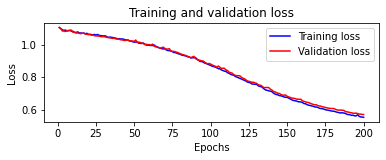

In [172]:
loss = history.history['loss']
val_loss = history.history['val_loss']

# loss와 val_loss를 그래프
epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

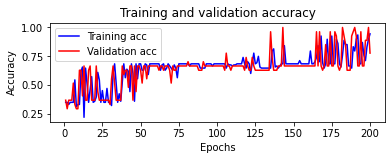

In [173]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [174]:
print("\n Test Accuracy : %.4f" %(model.evaluate(x_test, y_test)[1]))

1/1 [==============================] - 0s 16ms/step - loss: 0.5068 - categorical_accuracy: 0.6667

 Test Accuracy : 0.6667


In [175]:
model.save('iris_multi_model.h5')

# 모델 중단됐을때, retain

In [176]:
# csv read
data = pd.read_csv('/content/drive/MyDrive/iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

In [178]:
x_data = data.copy()
y_data = x_data.pop("species")
X = x_data.copy()

In [179]:
# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(y_data)
y = e.transform(y_data)
y_encoded = tf.keras.utils.to_categorical(y)

In [180]:
# train과 test를 분리
x_train1, x_test, y_train1, y_test = train_test_split(X, y_encoded, test_size=0.1, shuffle=True) 
# train set에서 train과 validation 분리
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2, shuffle=True)

In [181]:
model = tf.keras.models.load_model('iris_multi_model.h5')
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_37 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_38 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 99        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [182]:
# 모델 컴파일
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[tf.keras.metrics.categorical_accuracy])

In [183]:
result = model.fit(x_train, y_train, epochs=500, batch_size=50, validation_data=(x_valid,y_valid))
model.save('iris_model2.h5')

Epoch 1/500
3/3 [==============================] - 0s 74ms/step - loss: 0.5667 - categorical_accuracy: 0.7500 - val_loss: 0.5036 - val_categorical_accuracy: 0.7778
Epoch 2/500
3/3 [==============================] - 0s 12ms/step - loss: 0.5672 - categorical_accuracy: 0.6944 - val_loss: 0.5032 - val_categorical_accuracy: 0.7778
Epoch 3/500
3/3 [==============================] - 0s 10ms/step - loss: 0.5663 - categorical_accuracy: 0.7222 - val_loss: 0.5034 - val_categorical_accuracy: 0.7037
Epoch 4/500
3/3 [==============================] - 0s 19ms/step - loss: 0.5658 - categorical_accuracy: 0.6759 - val_loss: 0.5015 - val_categorical_accuracy: 0.8519
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 0.5651 - categorical_accuracy: 0.9444 - val_loss: 0.5016 - val_categorical_accuracy: 0.8148
Epoch 6/500
3/3 [==============================] - 0s 9ms/step - loss: 0.5644 - categorical_accuracy: 0.7685 - val_loss: 0.5016 - val_categorical_accuracy: 0.7778
Epoch 7/500
3/3 [=

In [184]:
print(result.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


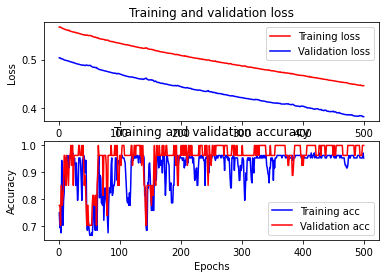

In [185]:
### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 binary_accuracy와 val_binary_accuracy key를 가지는 값들만 추출
acc = result.history['categorical_accuracy']
val_acc = result.history['val_categorical_accuracy']

### binary_accuracy와 val_binary_accuracy key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [187]:
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test,y_test)[1]))

1/1 [==============================] - 0s 15ms/step - loss: 0.3861 - categorical_accuracy: 1.0000

 Test Accuracy: 1.0000


In [190]:
#모델 불러오기
model=tf.keras.models.load_model('iris_model2.h5')

In [191]:
# 모델 컴파일
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[tf.keras.metrics.categorical_accuracy])

In [211]:
import math
def step_decay(epoch):
  initial_lrate = 0.1
  drop=0.5
  epochs_drop=10.0
  lrate=initial_lrate * math.pow(drop,math.floor(1+epoch)/(epochs_drop))
  return lrate

In [214]:
#학습할 때 돌릴 callback함수 list선언
modelpath = "./{epoch:02d}-{val_loss:.4f}.h5"
callback_list=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20),
               tf.keras.callbacks.ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True),
               tf.keras.callbacks.LearningRateScheduler(step_decay,verbose=1)]

In [215]:
#학습에 callback lish 전달
result = model.fit(x_train, y_train, epochs=200, batch_size= 50, validation_data = (x_valid, y_valid), callbacks=callback_list)

Epoch 1/200

Epoch 00001: LearningRateScheduler setting learning rate to 0.09330329915368074.
3/3 [==============================] - 0s 10ms/step - loss: 0.4448 - categorical_accuracy: 0.8981 - val_loss: 0.3960 - val_categorical_accuracy: 0.7778

Epoch 00001: val_loss improved from inf to 0.39596, saving model to ./01-0.3960.h5
Epoch 2/200

Epoch 00002: LearningRateScheduler setting learning rate to 0.08705505632961241.
3/3 [==============================] - 0s 8ms/step - loss: 0.4618 - categorical_accuracy: 0.8241 - val_loss: 0.3771 - val_categorical_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.39596 to 0.37714, saving model to ./02-0.3771.h5
Epoch 3/200

Epoch 00003: LearningRateScheduler setting learning rate to 0.08122523963562356.
3/3 [==============================] - 0s 9ms/step - loss: 0.4399 - categorical_accuracy: 0.9722 - val_loss: 0.3778 - val_categorical_accuracy: 0.9630

Epoch 00003: val_loss did not improve from 0.37714
Epoch 4/200

Epoch 00004: LearningRateSc

In [210]:
# EarlyStopping ( 성능 향상이 멈추면 훈련 중지
#                 monitor : 모델의 검증 정확도를 모니터링
#                 patience : 에포크보다 더 길게 정확도가 향상되지 않으면 훈련 중지 (ex: patience=1이면, 에포크 2가 넘어갔을때)

# ModelCheckpoint ( 에포크 마다 현재 가중치 저장
#                 filepath : 모델 파일 경로
#                 save_best_only : val_loss가 줄었을때만 저장.
#                 verbose : 값 화면 표시)

# TensorBoard(log_dir='log_dir', : log 저장 폴더
#             histogram_freq=1, : 1 에포크마다 활성화 히스토그램 출력)

##  logdir가 있는 폴더에가서  tensorboard --logdir=./log_dir/   http://localhost:6006